In [248]:
## Packages
# system
import os
# data wrangling
import numpy as np
import pandas as pd
from scipy import stats
from dfply import *
import statistics
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.width', 1000)
pd.set_option('precision', 37)

In [111]:
%% time
## read in data 
raw_path = os.path.join('../../../', 'raw_data/')
processed_path = os.path.join('../', 'processed_data/')

# bene = pd.read_csv(os.path.join(raw_path, 'Train_Beneficiarydata-1542865627584.csv'))
# flag = pd.read_csv(os.path.join(raw_path, 'Train-1542865627584.csv'))

df_ip = pd.read_csv(os.path.join(processed_path,'df_ip.csv'), index_col = 0)
df_op = pd.read_csv(os.path.join(processed_path,'df_op.csv'), index_col = 0)

flag = pd.read_csv(os.path.join(raw_path, 'Train-1542865627584.csv'))

UsageError: Cell magic `%%` not found.


In [228]:
df_ip.Provider.nunique()

2092

In [230]:
df_op.Provider.nunique()

5012

In [235]:
provider_intercept = list(set(df_ip.Provider.to_list()).intersection(set(df_op.Provider.to_list()) ))
len(provider_intercept)

1694

In [237]:
print('ip', df_ip.InscClaimAmtReimbursed.mean())
print('op', df_op.InscClaimAmtReimbursed.mean())

ip 10087.884073726344
op 286.33479932861667


In [288]:
r_ip = df_ip.groupby('Provider', as_index=False).InscClaimAmtReimbursed.mean()
r_op = df_op.groupby('Provider', as_index=False).InscClaimAmtReimbursed.mean()
r_ip.head()

Provider
PRV51001    19400.0000000000000000000000000000000000000
PRV51003     9241.9354838709678006125614047050476074219
PRV51007     6333.3333333333330301684327423572540283203
PRV51008    12500.0000000000000000000000000000000000000
PRV51011     5000.0000000000000000000000000000000000000
Name: InscClaimAmtReimbursed, dtype: float64

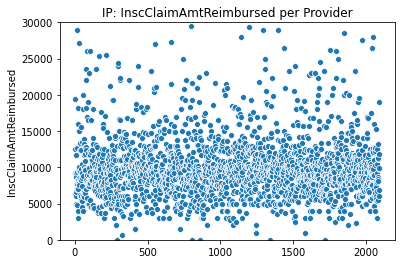

Text(0.5, 1.0, 'OP: InscClaimAmtReimbursed per Provider')

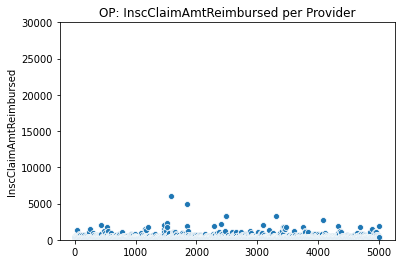

In [281]:
sns.scatterplot(y = 'InscClaimAmtReimbursed', x = r_ip.index, data = r_ip)
plt.ylim(0, 30000)
plt.title('IP: InscClaimAmtReimbursed per Provider')
plt.show()
sns.scatterplot(y = 'InscClaimAmtReimbursed', x = r_op.index, data = r_op)
plt.ylim(0, 30000)
plt.title('OP: InscClaimAmtReimbursed per Provider')

In [289]:
import scipy.stats as stats
display(stats.f_oneway(r_ip, r_op))
display(stats.ttest_ind(r_ip, r_op))

F_onewayResult(statistic=15925.238676373983, pvalue=0.0)

Ttest_indResult(statistic=126.1952403079212, pvalue=0.0)

In [283]:
r_ip = df_ip.groupby('Provider', as_index=False).BeneID.nunique().to_frame()
r_op = df_op.groupby('Provider', as_index=False).BeneID.nunique().to_frame()
r_ip.head()

,BeneID
0,5
1,53
2,3
3,2
4,1


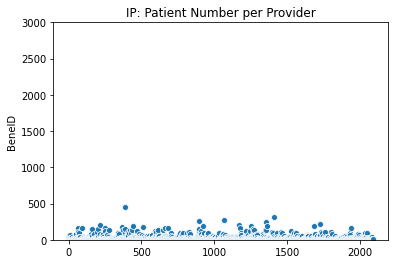

Text(0.5, 1.0, 'OP: Patient Number per Provider')

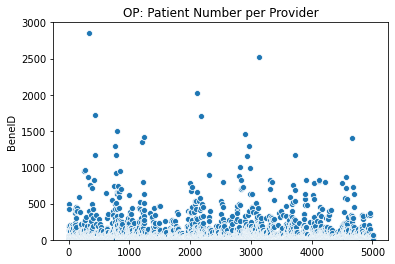

In [286]:
sns.scatterplot(y = 'BeneID', x = r_ip.index, data = r_ip)
plt.ylim(0, 3000)
plt.title('IP: Patient Number per Provider')
plt.show()
sns.scatterplot(y = 'BeneID', x = r_op.index, data = r_op)
plt.ylim(0, 3000)
plt.title('OP: Patient Number per Provider')

In [285]:
import scipy.stats as stats
display(stats.f_oneway(r_ip, r_op))
display(stats.ttest_ind(r_ip, r_op))

F_onewayResult(statistic=array([240.74356984]), pvalue=array([2.02446809e-53]))

Ttest_indResult(statistic=array([-15.51591344]), pvalue=array([2.02446809e-53]))

In [229]:
flag.Provider.nunique()

5410

In [112]:
# duplicated claims
code_for_duplicate = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4',
                      'ClmProcedureCode_1', 'ClmProcedureCode_2', 
                      'ClmAdmitDiagnosisCode']


# keep = first will mark all duplicates except the 1st occurrence
df_ip_duplicate = df_ip.duplicated(subset = code_for_duplicate, keep=False).sum()
print('inpatient claims', df_ip.shape[0], 'duplicate #', df_ip_duplicate, round(df_ip_duplicate/df_ip.shape[0], ndigits = 3))

df_op_duplicate = df_op.duplicated(subset = code_for_duplicate, keep=False).sum()
print('outpatient claims', df_op.shape[0], 'duplicate #', df_op_duplicate, round(df_op_duplicate/df_op.shape[0], ndigits = 3))

inpatient claims 40474 duplicate # 1433 0.035
outpatient claims 517737 duplicate # 230185 0.445


In [164]:
# duplicate claim dataframe
dup_ip = df_ip[df_ip.duplicated(subset = code_for_duplicate, keep=False)].sort_values(by = 'ClmDiagnosisCode_1')
print(dup_ip.shape)
print(dup_ip.duplicated(subset = code_for_duplicate, keep = False).all())

# number duplicated groups
# ngroup_dup_ip = dup_ip.groupby(code_for_duplicate).ngroups
# dup_ip_state = dup_ip.groupby(code_for_duplicate)
dup_ip['group'] = dup_ip.groupby(code_for_duplicate).grouper.group_info[0] + 1
display(dup_ip.group)

(1433, 58)
True


22904      0
10448      0
23923      0
13514      0
11871      0
26377      0
3349       0
2471       0
5671       0
37958      0
10657      0
1297       0
18169      0
26048      0
3253       0
28445      0
7869       0
14917      0
278        0
5680       0
27833      0
8478       0
26360      0
33284      0
20779      0
22180      0
20548      1
27108      1
17408      0
17097      0
5815       0
36798      0
34271      0
26236      0
8819       0
38973      0
32254      0
25540      0
32387      0
33577      0
32962      0
3331       0
223        0
34795      0
27354      0
2922       0
30878      0
12611      0
24563      0
30461      0
655        0
4268       0
2270       0
12805      0
5248       0
22793      0
12724      0
27134      0
18729      2
30659      2
20963      0
17836      0
4375       0
27192      0
24431      3
20761      3
11798      0
5121       0
34126      4
18636      4
25340      5
10896      0
11562      7
36835      5
25027      8
20433      7
35301      0

In [154]:
dup_ip['group_test'] = dup_ip.groupby(code_for_duplicate).ngroup()
dup_ip['group_test'].head()

22904   -1
10448   -1
23923   -1
13514   -1
11871   -1
Name: group_test, dtype: int64

In [172]:
dup_ip.shape

(1433, 59)

In [171]:
dup_ip.groupby(code_for_duplicate)[code_for_duplicate.append('ClaimID')].head()

<ipython-input-171-a473faefe52b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dup_ip.groupby(code_for_duplicate)['ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4',


,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmProcedureCode_1,ClmProcedureCode_2,ClmAdmitDiagnosisCode,ClaimID
22904,0030,27651,V462,4019,9904.0,NaN,27651,CLM47552
10448,0030,27651,V462,4019,9904.0,NaN,27651,CLM79538
23923,0031,42833,4730,515,NaN,NaN,7907,CLM32985
13514,0031,42833,4730,515,NaN,NaN,7907,CLM55886
11871,00845,36250,25000,2768,NaN,NaN,78791,CLM67047
20548,03849,5849,2948,496,9904.0,5849.0,78060,CLM49921
27108,03849,5849,2948,496,9904.0,5849.0,78060,CLM70803
18729,0417,E8780,E9308,2859,3352.0,5185.0,49120,CLM48411
30659,0417,E8780,E9308,2859,3352.0,5185.0,49120,CLM58737
24431,1536,56881,9982,5180,1736.0,5119.0,5529,CLM43623


In [201]:
dup_ip.groupby(code_for_duplicate).sum().reset_index()

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmProcedureCode_1,ClmProcedureCode_2,ClmAdmitDiagnosisCode,ClaimID,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimDuration,HospitalDuration,TotalPaid,group
0,03849,5849,2948,496,9904.0,5849.0,78060,CLM49921,20000,1068.0,0.0,0.0,0.0,0.0,1,1,26,910,12,12,0,0,0,1,0,1,0,0,1,1,1,44000,2136,27580,9590,8,8,21068.0,1
1,03849,5849,2948,496,9904.0,5849.0,78060,CLM70803,20000,1068.0,0.0,0.0,0.0,0.0,1,1,14,900,12,12,0,0,0,0,0,0,0,0,0,1,0,20000,1068,27170,5380,8,8,21068.0,1
2,0417,E8780,E9308,2859,3352.0,5185.0,49120,CLM48411,57000,1068.0,0.0,0.0,0.0,0.0,2,1,25,240,12,12,0,0,0,1,0,0,0,0,1,1,1,62200,1068,620,700,13,13,58068.0,2
3,0417,E8780,E9308,2859,3352.0,5185.0,49120,CLM58737,57000,1068.0,0.0,0.0,0.0,0.0,1,1,10,450,12,12,1,0,1,1,0,0,0,1,1,1,1,62200,1068,1110,30,13,13,58068.0,2
4,1536,56881,9982,5180,1736.0,5119.0,5529,CLM43433,29000,1068.0,2762.0,0.0,0.0,0.0,2,2,14,910,12,12,1,1,1,0,1,1,1,0,1,1,1,34000,1068,0,0,25,25,30068.0,3
5,1536,56881,9982,5180,1736.0,5119.0,5529,CLM43623,29000,1068.0,2762.0,0.0,0.0,0.0,1,1,10,160,12,12,1,0,1,0,1,0,1,0,1,1,1,34000,1068,90,10,25,25,30068.0,3
6,1551,51881,5762,1991,5011.0,4019.0,5750,CLM61339,13000,1068.0,0.0,0.0,0.0,0.0,1,1,22,90,12,12,1,0,1,1,1,1,0,1,0,1,0,14710,1068,4660,1360,19,19,14068.0,4
7,1551,51881,5762,1991,5011.0,4019.0,5750,CLM63761,13000,1068.0,0.0,0.0,0.0,0.0,1,1,52,690,12,12,1,0,1,1,1,1,1,0,1,1,0,14710,1068,120,20,19,19,14068.0,4
8,1623,2724,V1042,3051,3249.0,496.0,1623,CLM51783,13000,1068.0,0.0,0.0,0.0,0.0,2,1,5,520,12,12,0,0,0,0,0,1,1,0,0,0,1,13000,1068,1370,30,7,7,14068.0,5
9,1623,2724,V1042,3051,3249.0,496.0,1623,CLM72172,13000,1068.0,0.0,0.0,0.0,0.0,2,1,24,720,12,12,0,0,0,0,0,1,0,0,0,1,1,13000,1068,1580,590,7,7,14068.0,5


In [202]:
dup_ip.groupby(code_for_duplicate, as_index=False).sum()

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmProcedureCode_1,ClmProcedureCode_2,ClmAdmitDiagnosisCode,ClaimID,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimDuration,HospitalDuration,TotalPaid,group
0,03849,5849,2948,496,9904.0,5849.0,78060,CLM49921,20000,1068.0,0.0,0.0,0.0,0.0,1,1,26,910,12,12,0,0,0,1,0,1,0,0,1,1,1,44000,2136,27580,9590,8,8,21068.0,1
1,03849,5849,2948,496,9904.0,5849.0,78060,CLM70803,20000,1068.0,0.0,0.0,0.0,0.0,1,1,14,900,12,12,0,0,0,0,0,0,0,0,0,1,0,20000,1068,27170,5380,8,8,21068.0,1
2,0417,E8780,E9308,2859,3352.0,5185.0,49120,CLM48411,57000,1068.0,0.0,0.0,0.0,0.0,2,1,25,240,12,12,0,0,0,1,0,0,0,0,1,1,1,62200,1068,620,700,13,13,58068.0,2
3,0417,E8780,E9308,2859,3352.0,5185.0,49120,CLM58737,57000,1068.0,0.0,0.0,0.0,0.0,1,1,10,450,12,12,1,0,1,1,0,0,0,1,1,1,1,62200,1068,1110,30,13,13,58068.0,2
4,1536,56881,9982,5180,1736.0,5119.0,5529,CLM43433,29000,1068.0,2762.0,0.0,0.0,0.0,2,2,14,910,12,12,1,1,1,0,1,1,1,0,1,1,1,34000,1068,0,0,25,25,30068.0,3
5,1536,56881,9982,5180,1736.0,5119.0,5529,CLM43623,29000,1068.0,2762.0,0.0,0.0,0.0,1,1,10,160,12,12,1,0,1,0,1,0,1,0,1,1,1,34000,1068,90,10,25,25,30068.0,3
6,1551,51881,5762,1991,5011.0,4019.0,5750,CLM61339,13000,1068.0,0.0,0.0,0.0,0.0,1,1,22,90,12,12,1,0,1,1,1,1,0,1,0,1,0,14710,1068,4660,1360,19,19,14068.0,4
7,1551,51881,5762,1991,5011.0,4019.0,5750,CLM63761,13000,1068.0,0.0,0.0,0.0,0.0,1,1,52,690,12,12,1,0,1,1,1,1,1,0,1,1,0,14710,1068,120,20,19,19,14068.0,4
8,1623,2724,V1042,3051,3249.0,496.0,1623,CLM51783,13000,1068.0,0.0,0.0,0.0,0.0,2,1,5,520,12,12,0,0,0,0,0,1,1,0,0,0,1,13000,1068,1370,30,7,7,14068.0,5
9,1623,2724,V1042,3051,3249.0,496.0,1623,CLM72172,13000,1068.0,0.0,0.0,0.0,0.0,2,1,24,720,12,12,0,0,0,0,0,1,0,0,0,1,1,13000,1068,1580,590,7,7,14068.0,5


In [194]:
# dup_ip.groupby(code_for_duplicate).ClmDiagnosisCode_1.transform("size")
# dup_ip.groupby(code_for_duplicate)['ClaimID'].nunique().reset_index()
dup_ip.groupby(code_for_duplicate).size().to_frame()

0
ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmProcedureCode_1 ClmProcedureCode_2 ClmAdmitDiagnosisCode ClaimID    
03849              5849               2948               496                9904.0             5849.0             78060                 CLM49921  1
                                                                                                                                        CLM70803  1
0417               E8780              E9308              2859               3352.0             5185.0             49120                 CLM48411  1
                                                                                                                                        CLM58737  1
1536               56881              9982               5180               1736.0             5119.0             5529                  CLM43433  1
                                                                                                                                        CLM43623  1
1551               51881              5762               1991               5011.0             4019.0             5750                  CLM61339  1
                                                                                                                                        CLM63761  1
1623               2724               V1042              3051               3249.0             496.0              1623                  CLM51783  1
                                                                                                                                        CLM72172  1
                   486                V1052              43811              3404.0             4550.0             27651                 CLM32355  1
                                                                                                                                        CLM44713  1
                   5939               5180               5601               3452.0             5849.0             1623                  CLM34259  1
                                                                                                                                        CLM60753  1
                   V1043              60000              E8788              3220.0             4019.0             7931                  CLM47924  1
                                                                                                                                        CLM61796  1
1890               5601               49390              49121              5551.0             7850.0             4280                  CLM35505  1
                                                                                                                                        CLM40250  1
                                                                                                                                        CLM45289  1
1977               78959              42731              1975               9907.0             1629.0             4019                  CLM46367  1
                                                                                                                                        CLM67882  1
20288              40391              27542              42823              3893.0             2724.0             5849                  CLM48769  1
                                                                                                                                        CLM60822  1
2330               V431               4019               V171               8522.0             4019.0             1749                  CLM59432  1
                                                                                                                                        CLM68298  1
25080              40300              V5867              0389               8415.0             2761.0             7295                  CLM45330  1
  

In [185]:
# dup_ip.groupby('group').size()

In [114]:
dup_ip_provider = dup_ip[['group', 'PotentialFraud','Provider']]
dup_ip_provider = dup_ip_provider.sort_values(by = 'group')
# dup_ip_provider = dup_ip.groupby('group')['group', 'PotentialFraud','Provider']

# dup_ip_provider.groupby('group').Provider.nunique()
dup_ip_provider.reset_index().drop(['index'], axis = 1, inplace=True)
dup_ip_provider.head()

# provider number per group-flag
dup_ip_provider_1 = pd.DataFrame(dup_ip_provider.groupby(['group', 'PotentialFraud']).Provider.nunique())
# dup_ip_provider_1.head()

# pivot by fraud flag
dup_ip_provider_2 = dup_ip_provider_1.pivot_table(index = 'group', columns = 'PotentialFraud', values = 'Provider')
# print(dup_ip_provider_2.columns)
# display(dup_ip_provider_2)

# dup_ip_provider_2['noflag'] = 
dup_ip_provider_2['hasNo'] = dup_ip_provider_2['No'].isnull()
print('# of groups has no flagged provider', dup_ip_provider_2.hasNo.sum())
print('total # of groups', len(dup_ip_provider_2))
print('percentage', round(dup_ip_provider_2.hasNo.sum() / len(dup_ip_provider_2), ndigits=4)*100, '%')

# of groups has no flagged provider 33
total # of groups 106
percentage 31.130000000000003 %


In [203]:
dup_ip_provider_claimDt = dup_ip[['group', 'PotentialFraud','Provider','ClaimStartDt']].sort_values(by = 'group')
dup_ip_provider_claimDt = dup_ip_provider_claimDt.reset_index().drop(['index'], axis = 1)
# dup_ip_provider_claimDt.head(10)

dup_ip_provider_claimDt.groupby(['group', 'PotentialFraud'])['ClaimStartDt'].unique().to_frame().head()
dup_ip_provider_claimDt.groupby(['group', 'PotentialFraud'])['ClaimStartDt'].unique().to_frame().head()
dup_ip_provider_claimDt.groupby(['group', 'PotentialFraud'])['Provider'].unique().to_frame().head()

dup_ip_provider_claimDt_group = dup_ip_provider_claimDt.groupby(['group', 'PotentialFraud', 'Provider'])\
['ClaimStartDt'].unique().to_frame()
dup_ip_provider_claimDt_group.head()
dup_ip_provider_claimDt.head()

,group,PotentialFraud,Provider,ClaimStartDt
0,0,Yes,PRV51940,2009-04-19
1,0,No,PRV51960,2009-05-10
2,0,Yes,PRV56481,2009-09-25
3,0,No,PRV52552,2009-10-02
4,0,Yes,PRV56647,2009-03-30


In [204]:
foo = pd.DataFrame(dup_ip_provider_claimDt.groupby(['group']))
foo.head()

,0,1
0,0,group PotentialFraud Provider ClaimStar...
1,1,group PotentialFraud Provider ClaimStar...
2,2,group PotentialFraud Provider ClaimStar...
3,3,group PotentialFraud Provider ClaimStar...
4,4,group PotentialFraud Provider ClaimStar...


In [212]:
temp = list(dup_ip_provider_claimDt.groupby(['group']))

In [215]:
temp[1][0]

1

In [209]:
foo.iloc[2,0]
foo.iloc[2,1]

,group,PotentialFraud,Provider,ClaimStartDt
1222,2,Yes,PRV54258,2009-04-25
1223,2,No,PRV52130,2009-07-07


In [116]:
dup_ip_provider_claimDt.groupby('group').Provider.nunique()
dup_ip_provider_claimDt.iloc[45,]

# foo = pd.DataFrame(dup_ip_provider_claimDt.groupby(['group', 'PotentialFraud']))
foo = pd.DataFrame(dup_ip_provider_claimDt.groupby(['group']))
# display(foo.iloc[2,])
print('group', foo.iloc[2,0])
display('content', foo.iloc[2,1])
print('row number', len(foo.iloc[2,1]))
display(foo.iloc[2,1].iloc[0,])
print('iloc[i,1]', foo.iloc[0,1].iloc[0,1])
print('iloc[i,2]', foo.iloc[0,1].iloc[0,2])
print('iloc[i,3]', foo.iloc[0,1].iloc[0,3])

group 2


'content'

,group,PotentialFraud,Provider,ClaimStartDt
1222,2,Yes,PRV54258,2009-04-25
1223,2,No,PRV52130,2009-07-07


row number 2


group                      2
PotentialFraud           Yes
Provider            PRV54258
ClaimStartDt      2009-04-25
Name: 1222, dtype: object

iloc[i,1] Yes
iloc[i,2] PRV51940
iloc[i,3] 2009-04-19


In [122]:
dup_ip_provider_claimDt.groupby('group').size()

group
0      1220
1         2
2         2
3         2
4         2
5         2
6         2
7         2
8         2
9         3
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
20        2
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
30        2
31        2
32        2
33        2
34        2
35        2
36        2
37        2
38        2
39        2
40        2
41        2
42        2
43        2
44        2
45        2
46        2
47        2
48        2
49        2
50        2
51        3
52        3
53        2
54        2
55        2
56        2
57        2
58        2
59        2
60        2
61        2
62        2
63        2
64        2
65        2
66        2
67        2
68        2
69        2
70        2
71        2
72        2
73        2
74        2
75        2
76        2
77        2
78        2
79        2
80        2
81        2
82        

In [226]:
temp = foo.iloc[2,1]
display(temp)
# temp.ClaimStartDt.idxmin()
temp[temp.ClaimStartDt == temp.ClaimStartDt.min()].Provider.item()

,group,PotentialFraud,Provider,ClaimStartDt
1222,2,Yes,PRV54258,2009-04-25
1223,2,No,PRV52130,2009-07-07


'PRV54258'

In [224]:
temp.ClaimStartDt.index(temp.ClaimStartDt.min())
# values.index(min(values))

TypeError: 'Int64Index' object is not callable

In [124]:
temp = foo.iloc[2,1]
display(temp)
# temp.ClaimStartDt.idxmax()
temp[temp.ClaimStartDt == temp.ClaimStartDt.max()].Provider.item()

,group,PotentialFraud,Provider,ClaimStartDt
1222,2,Yes,PRV54258,2009-04-25
1223,2,No,PRV52130,2009-07-07


'PRV52130'

In [125]:
giver = {}
for i in range(len(foo)):
    # foo.iloc[i, 1] is the dataframe of contents
    temp = foo.iloc[i,1] 
    early = temp.ClaimStartDt.min()
    value = temp[temp.ClaimStartDt == early].Provider
    key = i+1
    giver.update({key:value})

In [227]:
giver

{1: 1154    PRV51038
 Name: Provider, dtype: object, 2: 1220    PRV54367
 Name: Provider, dtype: object, 3: 1222    PRV54258
 Name: Provider, dtype: object, 4: 1225    PRV54367
 Name: Provider, dtype: object, 5: 1227    PRV53787
 Name: Provider, dtype: object, 6: 1228    PRV51495
 Name: Provider, dtype: object, 7: 1230    PRV55462
 Name: Provider, dtype: object, 8: 1232    PRV52148
 Name: Provider, dtype: object, 9: 1235    PRV53770
 Name: Provider, dtype: object, 10: 1237    PRV55836
 Name: Provider, dtype: object, 11: 1239    PRV57425
 Name: Provider, dtype: object, 12: 1242    PRV57492
 Name: Provider, dtype: object, 13: 1243    PRV51584
 Name: Provider, dtype: object, 14: 1246    PRV52020
 Name: Provider, dtype: object, 15: 1248    PRV51809
 Name: Provider, dtype: object, 16: 1249    PRV53295
 Name: Provider, dtype: object, 17: 1251    PRV52114
 Name: Provider, dtype: object, 18: 1254    PRV55236
 Name: Provider, dtype: object, 19: 1255    PRV56895
 Name: Provider, dtype: object, 2

In [126]:
# dup_ip_provider_claimDt.Provider.iloc[1] in giver.values()
# 'PRV51940' in giver.values()
giver.values()
# percentage coming from flagged provider
print(giver[45])
print("=============")
print(giver[45].iloc[0])

1307    PRV52128
Name: Provider, dtype: object
PRV52128


In [127]:
for k in giver:
    if len(giver[k]) > 1:
        print(k, len(giver[k]))

74 2
103 2
106 2


In [128]:
print(giver[74])
print(giver[103])
print(giver[106])

1367    PRV55018
1368    PRV55018
Name: Provider, dtype: object
1425    PRV51842
1426    PRV51842
Name: Provider, dtype: object
1431    PRV52019
1432    PRV52019
Name: Provider, dtype: object


In [129]:
# if more than 1 provider, choose the first one (temp, need to fix and choose by earlier date)
# list(map(lambda x: x.iloc[0], giver))
giver_1 = {}
for k in giver:
    giver_1[k] = giver[k].iloc[0]

In [130]:
# pd.DataFrame(giver_1.items(), columns = ['index', 'provider'])
info_giver = pd.DataFrame.from_dict(giver_1, orient='index', columns=['Provider'])
info_giver['giver'] = 1
info_giver.head()

,Provider,giver
1,PRV51038,1
2,PRV54367,1
3,PRV54258,1
4,PRV54367,1
5,PRV53787,1


In [62]:
# # merge 
# test = df_ip.merge(info_giver, how='left', on='Provider')
# test['info'] = test['info'].fillna('provider')

In [76]:
# merge
temp = dup_ip.merge(info_giver, how = 'left', on = 'Provider')
# temp['info'] = test['info'].fillna('receiver')
temp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimDuration,HospitalDuration,TotalPaid,group,giver
0,BENE30902,CLM47552,2009-04-19,2009-04-26,PRV51940,5000,PHY370785,PHY322328,NaN,2009-04-19,27651,1068.0,2009-04-26,349,0030,27651,V462,4019,V103,53081,70703,311,2768,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,1936-03-01,NaN,1,1,0,7,70,12,12,1,1,1,1,1,0,1,1,1,1,1,5000,1068,620,240,Yes,7,7,6068.0,0,NaN
1,BENE60082,CLM79538,2009-12-14,2009-12-21,PRV55209,5000,PHY341560,PHY341560,NaN,2009-12-14,27651,1068.0,2009-12-21,338,0030,27651,V462,4019,V103,53081,70703,311,2768,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,1934-01-01,NaN,2,1,0,34,400,12,12,1,1,1,1,1,0,1,1,1,1,1,5000,1068,70,20,Yes,7,7,6068.0,0,NaN
2,BENE61653,CLM32985,2009-01-08,2009-01-14,PRV55916,8000,PHY417910,NaN,PHY328051,2009-01-08,7907,1068.0,2009-01-14,869,0031,42833,4730,515,5849,78552,5990,486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1927-09-01,NaN,1,1,0,39,560,12,12,1,0,0,1,1,1,1,1,1,1,1,8000,1068,910,1340,No,6,6,9068.0,0,NaN
3,BENE56846,CLM55886,2009-06-16,2009-06-22,PRV56560,8000,PHY352642,NaN,PHY396843,2009-06-16,7907,1068.0,2009-06-22,856,0031,42833,4730,515,5849,78552,5990,486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1927-04-01,NaN,2,1,0,45,130,12,12,1,0,0,1,1,0,1,0,1,1,1,8000,1068,14310,30,Yes,6,6,9068.0,0,NaN
4,BENE11923,CLM67047,2009-09-07,2009-09-12,PRV53855,5000,PHY322814,NaN,NaN,2009-09-07,78791,1068.0,2009-09-12,383,00845,36250,25000,2768,5533,4439,V103,40390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1934-08-01,NaN,2,1,Y,22,10,12,12,0,0,0,1,0,0,0,0,1,1,1,34900,5340,3210,930,Yes,5,5,6068.0,0,NaN


In [79]:
temp.groupby('Provider').giver.unique()

Provider
PRV51003    [nan]
PRV51021    [nan]
PRV51023    [nan]
PRV51024    [nan]
PRV51030    [1.0]
PRV51037    [nan]
PRV51038    [1.0]
PRV51040    [nan]
PRV51060    [nan]
PRV51064    [nan]
PRV51065    [nan]
PRV51086    [1.0]
PRV51102    [nan]
PRV51108    [nan]
PRV51119    [nan]
PRV51126    [nan]
PRV51140    [nan]
PRV51145    [1.0]
PRV51146    [nan]
PRV51148    [nan]
PRV51149    [nan]
PRV51151    [nan]
PRV51159    [nan]
PRV51160    [nan]
PRV51164    [1.0]
PRV51165    [nan]
PRV51238    [nan]
PRV51242    [nan]
PRV51244    [nan]
PRV51249    [nan]
PRV51252    [nan]
PRV51261    [nan]
PRV51263    [nan]
PRV51266    [nan]
PRV51274    [nan]
PRV51284    [nan]
PRV51288    [nan]
PRV51300    [nan]
PRV51334    [nan]
PRV51342    [nan]
PRV51350    [nan]
PRV51357    [nan]
PRV51360    [nan]
PRV51378    [nan]
PRV51387    [nan]
PRV51389    [nan]
PRV51390    [nan]
PRV51391    [nan]
PRV51393    [nan]
PRV51399    [nan]
PRV51415    [nan]
PRV51418    [1.0]
PRV51421    [nan]
PRV51427    [nan]
PRV51436    [nan]
P

In [109]:
giver = temp.groupby('Provider').giver.sum().to_frame()
# giver

AttributeError: 'DataFrameGroupBy' object has no attribute 'giver'

In [88]:
new = giver.merge(flag, how='left', left_index=True, right_on='Provider')
new.head()

,giver,Provider,PotentialFraud
1,0.0,PRV51003,Yes
13,0.0,PRV51021,Yes
14,0.0,PRV51023,No
15,0.0,PRV51024,No
20,2.0,PRV51030,No


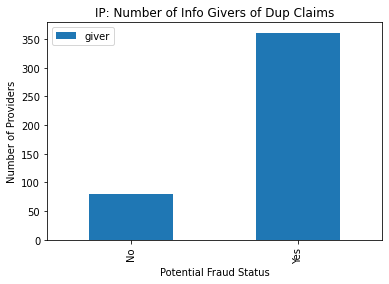

In [96]:
new.groupby('PotentialFraud').giver.sum().to_frame().plot(kind = 'bar')
plt.ylabel('Number of Providers')
plt.xlabel('Potential Fraud Status')
plt.title('IP: Number of Info Givers of Dup Claims')
plt.savefig('../output/dup_ip_info_giver.png')